In [1]:
# import first group of necessary libraries
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Exploratory Data Analysis:

In [2]:
# Let's chose the symbols for which to get data from yahoo finance, start and end date of the dataset
# I chose the symbols of companies that have developed Covid19 vaccine (Pfizer, Johnson & Johnson, Astrazeneca and Moderna) 
#star date will be 01/01/2010
#end date will be 15/02/2021

symbols_Pharma = (['JNJ', 'PFE', 'MRNA','AZN'])

start_date = '2010-01-01'
end_date = '2021-02-28'

# downloading data from yahoo finance for the chosen parameters:

df_Pharma = yf.download(symbols_Pharma, start_date, end_date)

[*********************100%***********************]  4 of 4 completed


In [3]:
df_Pharma.head()

Adj Close                                 Close                  \
                  AZN        JNJ MRNA        PFE        AZN        JNJ MRNA   
Date                                                                          
2009-12-31  13.931786  46.105129  NaN  11.348826  23.469999  64.410004  NaN   
2010-01-04  14.071281  46.298389  NaN  11.810514  23.705000  64.680000  NaN   
2010-01-05  13.786353  45.761547  NaN  11.642064  23.225000  63.930000  NaN   
2010-01-06  13.676538  46.133747  NaN  11.604629  23.040001  64.449997  NaN   
2010-01-07  13.824937  45.804497  NaN  11.560955  23.290001  63.990002  NaN   

                            High             ...  Low                  Open  \
                  PFE        AZN        JNJ  ... MRNA        PFE        AZN   
Date                                         ...                              
2009-12-31  17.258064  23.629999  65.120003  ...  NaN  17.258064  23.545000   
2010-01-04  17.960152  23.764999  64.989998  ...  NaN  17.305504  23.709999   
2010-01-05  17.703985  23.465000  64.620003  ...  NaN  17.599621  23.434999   
2010-01-06  17.647058  23.045000  64.540001  ...  NaN  17.561670  22.915001   
2010-01-07  17.580645  23.325001  64.349998  ...  NaN  17.514231  23.250000   

                                        Volume                           
                  JNJ MRNA        PFE      AZN       JNJ MRNA       PFE  
Date                                                                     
2009-12-31  65.120003  NaN  17.447819  1134800   6962300  NaN  27063136  
2010-01-04  64.709999  NaN  17.333965  2606200   9506200  NaN  54898644  
2010-01-05  64.580002  NaN  17.950665  2666600  10673100  NaN  45714931  
2010-01-06  63.900002  NaN  17.703985  3020800  13171500  NaN  43640975  
2010-01-07  64.250000  NaN  17.685009  4454600  10901600  NaN  41557112  

[5 rows x 24 columns]

In [4]:
#General Close (closing price adjusted for stock splits and dividends) descriptive statistics Pharma Companies
df_Pharma[['Close']].describe()

Close                                      
               AZN          JNJ        MRNA          PFE
count  2808.000000  2808.000000  559.000000  2808.000000
mean     32.762270   104.097785   47.110760    29.012885
std       9.059434    30.391302   42.243423     7.240455
min      20.014999    57.020000   12.260000    13.415560
25%      24.809999    69.269997   17.680000    23.287476
50%      32.225000   102.764999   23.459999    30.531309
75%      37.002500   131.445004   67.860001    34.117645
max      61.099998   170.479996  185.979996    43.861481

In [5]:
# Define function to plot stock prices

def plot_data(df, symbols, title="Title", ylabel='Y', y=0 , step=50, ax=None,
              start_date = start_date, end_date = end_date):
    
    '''Plot stock prices
    INPUT:
    df: Dataframe
    title: Title
    ylabel: Label of y axis
    y: Horizontal line (integer)
    step: xticks step (integer)
    OUTPUT: 
    plot
    '''
    
    df1=df[start_date:end_date]
    
    ax = df1.plot(title=title, figsize=(16,10), ax=ax)
    ax.set_xlabel('Date')
    ax.set_ylabel(ylabel)
    ax.axhline(y=y, color='black')
    ax.legend(symbols, loc='upper left')
    try:
        plt.yticks(np.arange(0, df1.max().max()+step, step=step))
    except:
        pass
    plt.show()

In [6]:
#Pharma Companies with Covid19 Vaccine from January 2010

start_date='2010-01-01'
end_date='2021-02-28'
price_type='Close' 


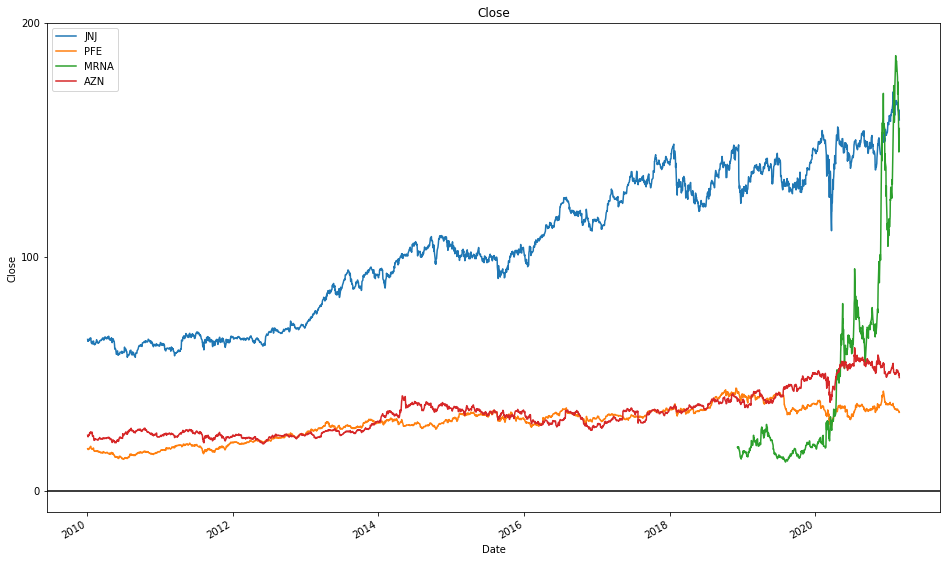

In [7]:
#EVO Close Price Pharma comapnies from 01/01/2010
plot_data(df_Pharma[price_type][symbols_Pharma][start_date:end_date], symbols_Pharma, title=price_type, ylabel=price_type, y=0, step=100)

In order to know How much money could we get if we invested our money in these companies for 11 years it's necessary to normalize data and plotting cumulative return for these companies.


A cumulative return on an investment is the aggregate amount that the investment has gained or lost over time, independent of the amount of time involved. The cumulative return is expressed as a percentage.

The cumulative return is the total change in the investment price over a set time—an aggregate return, not an annualized one.
Reinvesting the dividends or capital gains of an investment impacts its cumulative return.
Cumulative return figures for ETFs and mutual funds typically omit the impact of annual expense ratios and other fees on the fund's performance.
Taxes can also substantially reduce the cumulative returns for most investments unless they are held in tax-advantaged accounts.

The cumulative return of an asset that does not have interest or dividends is easily calculated by figuring out the amount of profit or loss over the original price. That can work well with assets like precious metals and growth stocks that do not issue dividends. In these cases, one can use the raw closing price to calculate the cumulative return.

On the other hand, the adjusted closing price provides a simple way to calculate the cumulative return of all assets. That includes assets like interest-bearing bonds and dividend-paying stocks. The adjusted closing price incorporates the impact of interest, dividends, stock splits, and other changes on the asset price. So, it is possible to obtain the cumulative return by using the first adjusted closing price as the original price of the security.

The cumulative return usually grows over time, so it tends to make older stocks and funds look impressive. It follows that the cumulative return is not a good way to compare investments unless they launched at the same time.


In [8]:
# Define function to normalize data from the first data in the serie

def normalize_data(df):
    '''normalize traiding data
    INPUT:
    df: DataFrame   
    OUTPUT :
    normalized: DataFrame
    '''
       
    df.fillna(method='ffill', inplace=True)
    df.fillna(method='bfill', inplace=True) 
    return df/df.iloc[0,:]

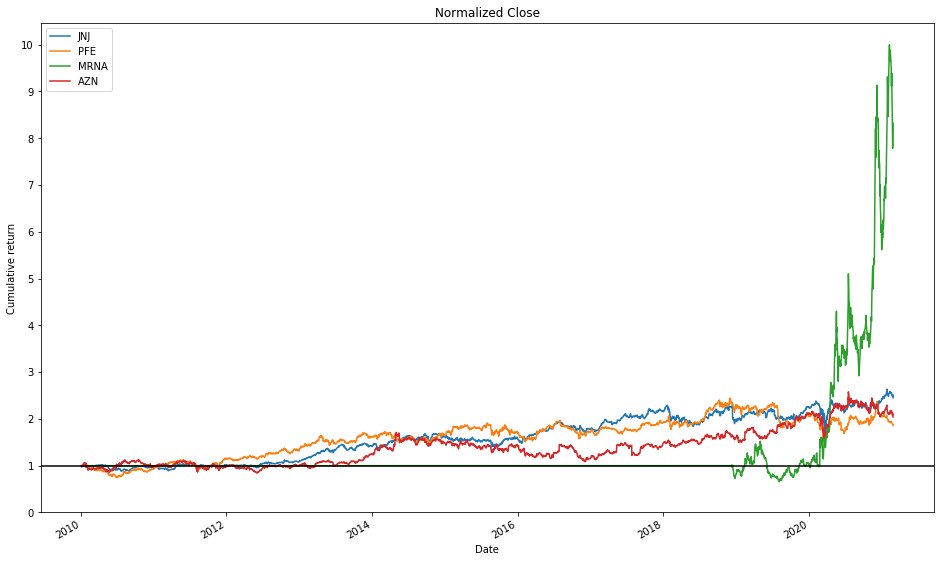

In [9]:
#EVO Close Price normalized Pharma comapnies from 01/01/2010


plot_data(normalize_data(df_Pharma[price_type][symbols_Pharma][start_date:end_date]), symbols_Pharma,title='Normalized {}'.format(price_type), ylabel='Cumulative return', step=1, y=1)
plt.show()

# Feature Engineering:

Creation of new varibles based on the original dataset:  
1.-Open: opening price,  
2.-High: highest price the stock traded at,   
3.-Volume: how many stocks were traded,   
4.-Adjusted Close: closing price (Close) and closing price adjusted for stock splits and dividends

In [10]:
#Initial Parameters:

symbol='symbol'
price_type = 'price_type'
start_date='start_date'
end_date='end_date'
df='df'
time_period='time period'

### Moving Average:

A moving average (MA) is a stock indicator that is commonly used in technical analysis.  
The reason for calculating the moving average of a stock is to help smooth out the price data over a specified period of time by creating a constantly updated average price.  
A simple moving average (SMA) is a calculation that takes the arithmetic mean of a given set of prices over the specific number of days in the past; for example, over the previous 15, 30, 100, or 200 days.  
Exponential moving averages (EMA) is a weighted average that gives greater importance to the price of a stock on more recent days, making it an indicator that is more responsive to new information.  


A moving average captures the average change in a data series over time. In finance, moving averages are often used by technical analysts to keep track of prices trends for specific securities:   
An upward trend in a moving average might signify an upswing in the price or momentum of a security, while a downward trend would be seen as a sign of decline. Today, there are a wide variety of moving averages to choose from, ranging from simple measures to complex formulas that require a computer program to efficiently calculate.

Generally, technical analysts will use moving averages to detect whether a change in momentum is occurring for a security, such as if there is a sudden downward move in a security’s price. Other times, they will use moving averages to confirm their suspicions that a change might be underway.   
For example, if a company’s share price rises above its 200-day moving average, that might be taken as a bullish signal.

A Bollinger Band® technical indicator has bands generally placed two standard deviations away from a simple moving average. In general, a move toward the upper band suggests the asset is becoming overbought, while a move close to the lower band suggests the asset is becoming oversold. 
Since standard deviation is used as a statistical measure of volatility, this indicator adjusts itself to market conditions.

In [11]:
def rolling_params(df, symbol, price_type, window=20):
    '''
    Create rolling mean, rolling standard deviation, upper_band and lower_band of 2 std
    INPUT:
    df: DataFrame
    symbol:Stock
    window: How many days (The number of observations used for calculating the statistic -20)
    price_type: Type of price for which create rolling parameters
    OUTPUT: 
    Rolling Mean, Rolling Standard Deviation, Upper_band and Lower_band of 2 std
    '''
    
    values = df[(price_type, symbol)]
    rolling_mean = df[(price_type, symbol)].rolling(window=window).mean()
    rolling_std = df[(price_type, symbol)].rolling(window=window).std()
    upper_band = rolling_mean + rolling_std*2
    lower_band = rolling_mean - rolling_std*2

    return values, rolling_mean, rolling_std, upper_band, lower_band

In [12]:
def plot_rolling(symbol, values, rolling_mean, upper_band, lower_band, title='Rolling mean 20 days {}'.format(symbol)):
    
    '''
    Plot rolling mean and upper/lower bands of a stock
    INPUT:
    symbol: Stock
    rolling_mean: Rolling 20 days mean of the stock
    upper_band: Upper band of the stock
    lower_band: Lower band of the stock
    title: Title
    OUTPUT: 
    plot
    '''
    
    ax = rolling_mean.plot(title=title, figsize=(16,8), color='orange',label='Rolling Mean')
    plt.plot(upper_band, label='Upper band',color='black')
    plt.plot(lower_band, label='Lower band',color='black')
    plt.plot(values, label='Stock Values',color='red')
    ax.set_xlabel('Date')
    ax.set_ylabel(price_type)
    ax.legend(loc='upper left')
    plt.show()
    return ax

In [13]:
#Parameters for Pfizer Analysis:

symbol='PFE'
price_type = 'Close'
start_date='2010-01-01'
end_date='2021-02-27'
df=df_Pharma
time_period=14

In [14]:
values, rolling_mean, rolling_std, upper_band, lower_band = rolling_params(df[start_date:end_date], symbol, price_type)

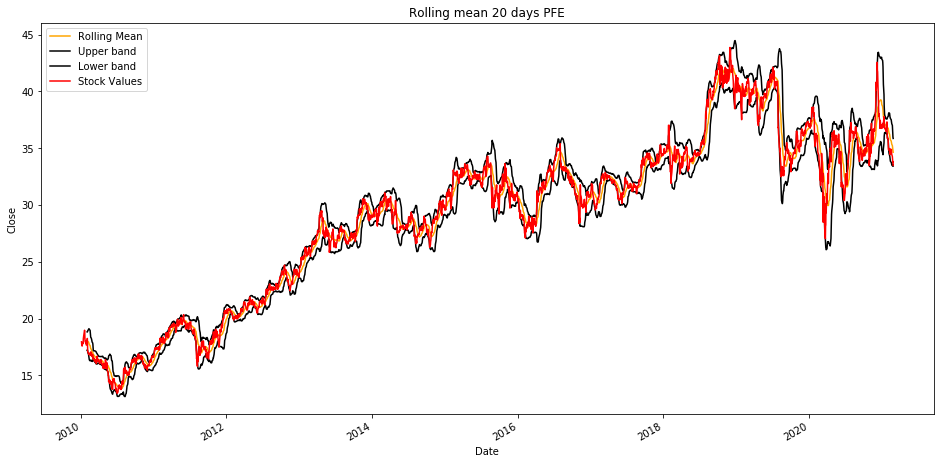

In [15]:
plot_rolling(symbol, values, rolling_mean, upper_band, lower_band, title='Rolling mean 20 days {}'.format(symbol))
plt.show()

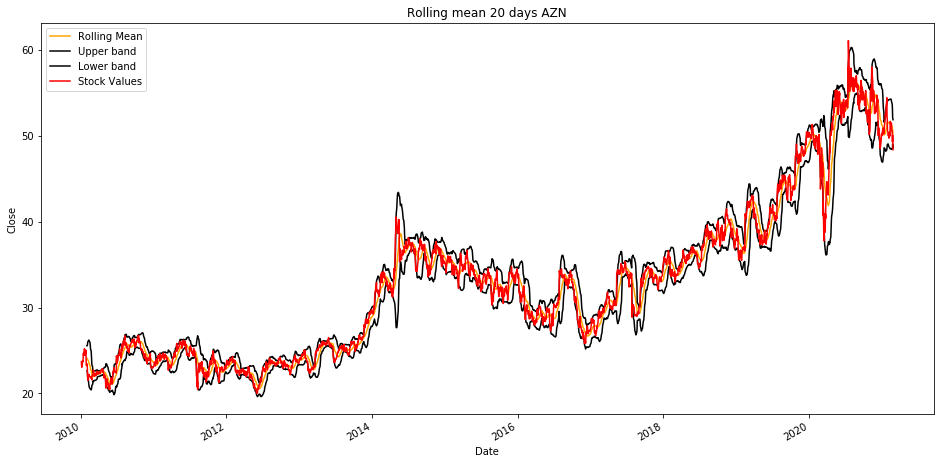

In [16]:
symbol='AZN'
price_type = 'Close'
start_date='2010-01-01'
end_date='2021-02-27'
df=df_Pharma
time_period=14

values, rolling_mean, rolling_std, upper_band, lower_band = rolling_params(df[start_date:end_date], symbol, price_type)

plot_rolling(symbol, values, rolling_mean, upper_band, lower_band, title='Rolling mean 20 days {}'.format(symbol))
plt.show()

### Returns:  

A return is the change in price of an asset, investment, or project over time, which may be represented in terms of price change or percentage change.
A positive return represents a profit while a negative return marks a loss.

Returns are often annualized for comparison purposes, while a holding period return calculates the gain or loss during the entire period an investment was held.
The real return accounts for the effects of inflation and other external factors, while the nominal return is only interested in price change.
The total return for stocks includes price change as well as dividend and interest payments.
Several return ratios exist for use in fundamental analysis.

Returns over periodic intervals of different lengths can only be compared when they have been converted to same length intervals. It is customary to compare returns earned during year-long intervals. The process of converting shorter or longer return intervals to annual returns is called annualization.

Nominal Return
A nominal return is the net profit or loss of an investment expressed in nominal terms. It can be calculated by figuring the change in the value of the investment over a stated time period plus any distributions minus any outlays.

Distributions received by an investor depend on the type of investment or venture but may include dividends, interest, rents, rights, benefits, or other cash-flows received by an investor. Outlays paid by an investor depend on the type of investment or venture but may include taxes, costs, fees, or expenditures paid by an investor to acquire, maintain, and sell an investment. 

Real Return
A real rate of return is adjusted for changes in prices due to inflation or other external factors. This method expresses the nominal rate of return in real terms, which keeps the purchasing power of a given level of capital constant over time.

Adjusting the nominal return to compensate for factors such as inflation allows you to determine how much of your nominal return is real return. Knowing the real rate of return of an investment is very important before investing your money. That’s because inflation can reduce the value as time goes on, just as taxes also chip away at it.


The daily return measures the dollar change in a stock's price as a percentage of the previous day's closing price. A positive return means the stock has grown in value, while a negative return means it has lost value.

Prudent investors know that a precise definition of return is situational and dependent on the financial data input to measure it. An omnibus term like profit could mean gross, operating, net, before tax, or after tax. An omnibus term like investment could mean selected, average, or total assets.


A holding period return is an investment's return over the time it is owned by a particular investor. Holding period return may be expressed nominally or as a percentage. When expressed as a percentage, the term often used is rate of return (RoR).


For example, the return earned during the periodic interval of a month is a monthly return and of a year is an annual return. Often, people are interested in the annual return of an investment, or year-on-year (YoY) return, which calculates the price change from today to that of the same date one year ago.

Returns over periodic intervals of different lengths can only be compared when they have been converted to same length intervals. It is customary to compare returns earned during year-long intervals. The process of converting shorter or longer return intervals to annual returns is called annualization.

Nominal Return
A nominal return is the net profit or loss of an investment expressed in nominal terms. It can be calculated by figuring the change in the value of the investment over a stated time period plus any distributions minus any outlays.

Distributions received by an investor depend on the type of investment or venture but may include dividends, interest, rents, rights, benefits, or other cash-flows received by an investor. Outlays paid by an investor depend on the type of investment or venture but may include taxes, costs, fees, or expenditures paid by an investor to acquire, maintain, and sell an investment. 

Real Return
A real rate of return is adjusted for changes in prices due to inflation or other external factors. This method expresses the nominal rate of return in real terms, which keeps the purchasing power of a given level of capital constant over time.

Adjusting the nominal return to compensate for factors such as inflation allows you to determine how much of your nominal return is real return. Knowing the real rate of return of an investment is very important before investing your money. That’s because inflation can reduce the value as time goes on, just as taxes also chip away at it.

Investors should also consider whether the risk involved with a certain investment is something they can tolerate given the real rate of return. Expressing rates of return in real values rather than nominal values, particularly during periods of high inflation, offers a clearer picture of an investment's value.




In [17]:
#Daily nominal returns

def daily_returns(symbol):
    '''
    Calculate daily returns for a given stock
    INPUT:
    symbol: Stock   
    OUTPUT: 
    daily returns
    '''
    
    daily_returns = (df[(price_type, symbol)][1:]/df[(price_type, symbol)][:-1].values)-1
    return daily_returns

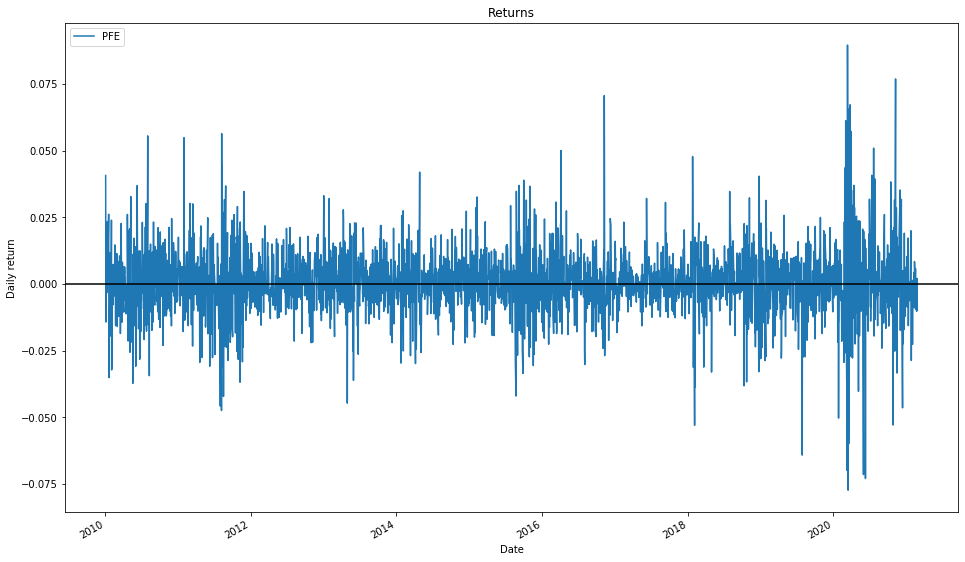

In [18]:
symbol='PFE'
plot_data(daily_returns(symbol), symbols=[symbol], title='Returns', ylabel='Daily return', y=0)
plt.show()

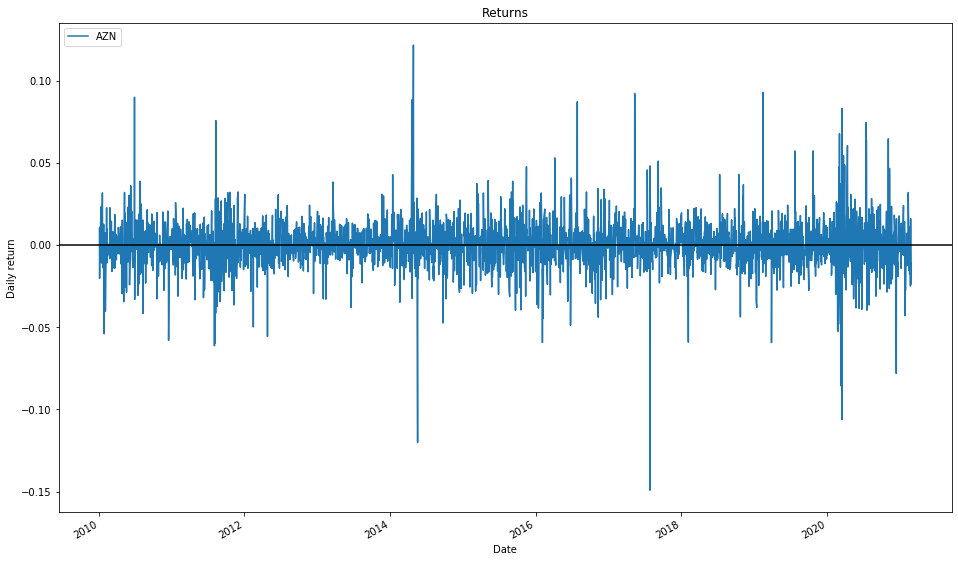

In [19]:
symbol='AZN'
plot_data(daily_returns(symbol), symbols=[symbol], title='Returns', ylabel='Daily return', y=0)
plt.show()

### Moving average convergence divergence (MACD)

Moving average convergence divergence (MACD) is calculated by subtracting the 26-period exponential moving average (EMA) from the 12-period EMA.  
MACD triggers technical signals when it crosses above (to buy) or below (to sell) its signal line.  
The speed of crossovers is also taken as a signal of a market is overbought or oversold.  
MACD helps investors understand whether the bullish or bearish movement in the price is strengthening or weakening.  

Now I would like to show how MACD (Moving Average Convergence Divergence) indicator can help predict if a stock price is going to grow of fall the next days. Divergence in this case representes a difference between two time series and represents MACD. These two time series are rolling exponential weighted means of short time period (I took low=12 days) and longer time perios (I took high=26).  
Second is substacted from the first and it is compared with exponential weighted means of even shorter time period (I took sig=9 days), which is called signal. So buy signal occurs when MACD is smaller than signal line, growing faster than that and line crosses signal line from below. At this point it is a Buy signal. If MACD ist above the signal line, falling faster than that and crosses it from above, it is a Sell signal.

Traders use MACD to identify changes in the direction or severity of a stock’s price trend. MACD can seem complicated at first glance, since it relies on additional statistical concepts such as the exponential moving average (EMA). But fundamentally, MACD helps traders detect when the recent momentum in a stock’s price may signal a change in its underlying trend. This can help traders decide when to enter, add to, or exit a position.

MACD is a lagging indicator. After all, all of the data used in MACD is based on the historical price action of the stock. Since it is based on historical data, it must necessarily “lag” the price. However, some traders use MACD histograms to predict when a change in trend will occur. For these traders, this aspect of the MACD might be viewed as a leading indicator of future trend changes.

A MACD positive divergence is a situation in which the MACD does not reach a new low, despite the fact that the price of the stock reached a new low. This is seen as a bullish trading signal—hence, the term “positive divergence.” If the opposite scenario occurs—the stock price reaching a new high, but the MACD failing to do so—this would be seen as a bearish indicator and referred to as a negative divergence.

Limitations of MACD  
One of the main problems with divergence is that it can often signal a possible reversal but then no actual reversal actually happens—it produces a false positive. The other problem is that divergence doesn't forecast all reversals. In other words, it predicts too many reversals that don't occur and not enough real price reversals.

"False positive" divergence often occurs when the price of an asset moves sideways, such as in a range or triangle pattern following a trend. A slowdown in the momentum—sideways movement or slow trending movement—of the price will cause the MACD to pull away from its prior extremes and gravitate toward the zero lines even in the absence of a true reversal.

In [20]:
def calc_macd(symbol, price_type = price_type, high = 26, low = 12, sig = 9, start_date = start_date, end_date=end_date):
    '''
    Create macd, signal
    INPUT:
    symbol: Stock
    high: high period EMA, by default 26-period EMA
    low: low period EMA, by default 12-period EMA
    price_type: type of price for which calculate parameters
    start_date: start date as datetime
    end_date: end date as datetime
    OUTPUT: 
    macd, signal
    '''
 
    values = df[(price_type, symbol)][start_date:end_date]
    macd = (values.ewm(span=low, adjust=False).mean()-values.ewm(span=high, adjust=False).mean())
    signal = macd.ewm(span=sig, adjust=False).mean()
    return macd, signal


### MACD for Pfizer:

In [21]:
symbol='PFE'
macd, signal = calc_macd(symbol)

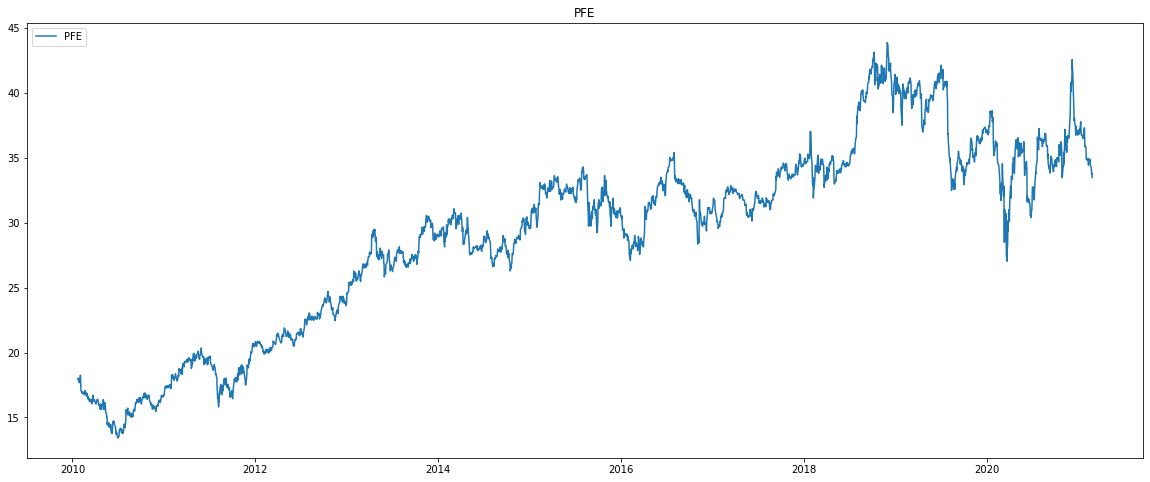

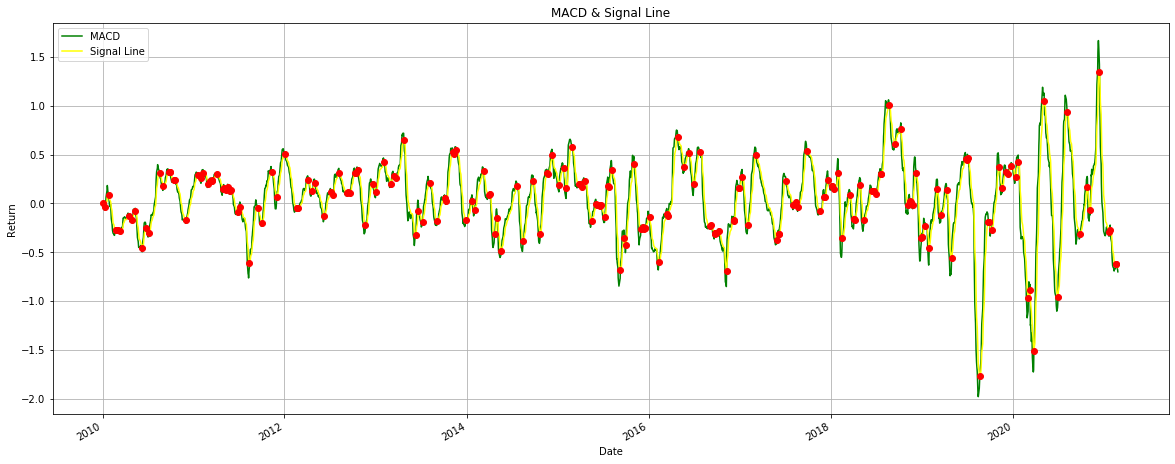

In [22]:
#Plotting 
df1 = df[(price_type, symbol)][start_date:end_date].iloc[time_period-1:]
plt.figure(figsize=(20,8))
plt.plot(df1, label = symbol)
plt.title(symbol)
plt.legend(loc='upper left')
plt.show()

# plot to show MACD
macd.plot(label='MACD', figsize=(20,8), color='green')
#plt.plot(values, label='Stock Price', color='black')
plt.plot(signal, label='Signal Line', color='yellow')
plt.grid(True)
idx = np.argwhere(np.diff(np.sign(signal - macd))).flatten()
plt.plot(macd.index[idx], signal[idx], 'ro')
plt.title('MACD & Signal Line')
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend(loc='upper left')
plt.show()

### MACD for AstraZeneca:

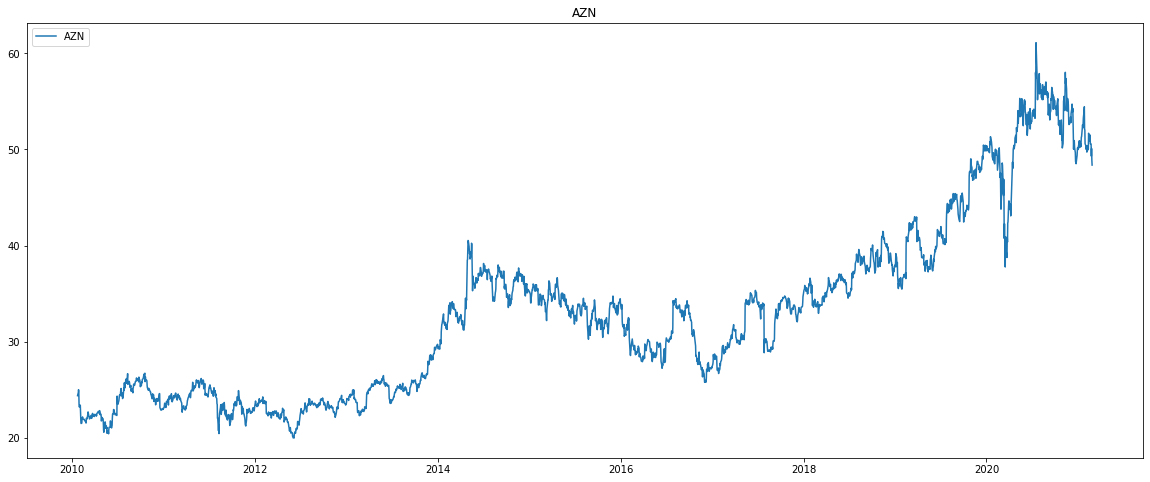

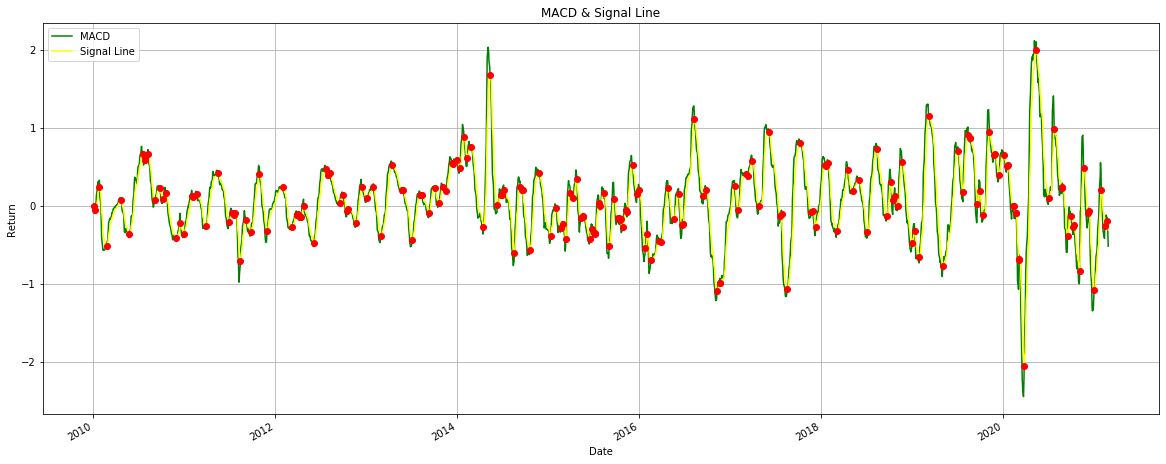

In [23]:
symbol='AZN'

macd, signal = calc_macd(symbol)

#Plotting 
df1 = df[(price_type, symbol)][start_date:end_date].iloc[time_period-1:]
plt.figure(figsize=(20,8))
plt.plot(df1, label = symbol)
plt.title(symbol)
plt.legend(loc='upper left')
plt.show()

# plot to show MACD
macd.plot(label='MACD', figsize=(20,8), color='green')
#plt.plot(values, label='Stock Price', color='black')
plt.plot(signal, label='Signal Line', color='yellow')
plt.grid(True)
idx = np.argwhere(np.diff(np.sign(signal - macd))).flatten()
plt.plot(macd.index[idx], signal[idx], 'ro')
plt.title('MACD & Signal Line')
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend(loc='upper left')
plt.show()


### RSI

The relative strength index (RSI) is a popular momentum oscillator developed in 1978.  
The RSI provides technical traders signals about bullish and bearish price momentum, and it is often plotted beneath the graph of an asset's price.  
An asset is usually considered overbought when the RSI is above 70% and oversold when it is below 30%. 

The primary trend of the stock or asset is an important tool in making sure the indicator's readings are properly understood. For example, well-known market technician Constance Brown, CMT, has promoted the idea that an oversold reading on the RSI in an uptrend is likely much higher than 30%, and an overbought reading on the RSI during a downtrend is much lower than the 70% level.1﻿

As you can see in the following chart, during a downtrend, the RSI would peak near the 50% level rather than 70%, which could be used by investors to more reliably signal bearish conditions. Many investors will apply a horizontal trendline that is between 30% and 70% levels when a strong trend is in place to better identify extremes. Modifying overbought or oversold levels when the price of a stock or asset is in a long-term, horizontal channel is usually unnecessary.

Limitations of the RSI  

The RSI compares bullish and bearish price momentum and displays the results in an oscillator that can be placed beneath a price chart. Like most technical indicators, its signals are most reliable when they conform to the long-term trend.

True reversal signals are rare and can be difficult to separate from false alarms. A false positive, for example, would be a bullish crossover followed by a sudden decline in a stock. A false negative would be a situation where there is a bearish crossover, yet the stock accelerated suddenly upward.

Since the indicator displays momentum, it can stay overbought or oversold for a long time when an asset has significant momentum in either direction. Therefore, the RSI is most useful in an oscillating market where the asset price is alternating between bullish and bearish movements.

The Relative Strength Index (RSI) is a measurement used by traders to assess the price momentum of a stock or other security. The basic idea behind RSI is to measure how quickly traders are bidding the price of the security up or down. RSI plots this result on a scale of 0 to 100. Readings below 30 generally indicate that the stock is oversold, while readings above 70 indicate that it is overbought. Traders will often place this RSI chart below the price chart for the security, so they can compare its recent momentum against its market price.

Another interesting technique, that could help predict stock prices movements is RSI (relative strength index). It indicates how strong is price momentum shif. It compares average losses and average gains for the previous days. RSI is calculated the following way:

RSI = 100-(100/(1+RS))

where RS is calculated as a propotion from average gain in last 14 days to average loss in last 14 days. So, for example if it was much more loss last days, then a stock is probably goes down and it could be an indicator to sell it. Other way, if it is significantly more gains for the last days than losses, the stock price is growing and it could be a sign to buy it. RSI could be from 0 to 100. Values over 80 represent signal to buy and under 20 a signal to sell. Values in the middle are neutral and dont require for any action. 14 is a common time period used when calculating RSI, even though another time period could be chosen for calculations.

In [24]:
#Calculate RSI

def calc_RSI(symbol, price_type = price_type, time_period = time_period, start_date = start_date, end_date=end_date):
    '''Calculate RSI
    INPUT:
    symbol - stock
    time_period = tim eperiod for calculation
    price_type - type of price for which calculate parameters
    start_date - start date as datetime
    end_date - end date as datetime
    OUTPUT: macd, signal'''

    delta = df[(price_type, symbol)][start_date:end_date].diff(1)
    gains, losses =  delta.copy(), delta.copy()
    gains[gains < 0] = 0 
    losses[losses > 0] = 0 
    average_gain = gains.rolling(window=time_period).mean()
    average_loss = abs(losses.rolling(window=time_period).mean())
    RS = average_gain / average_loss
    RSI = 100.0 - (100.0/ (1.0 + RS))
    return RSI

### RSI for Pfizer:

In [25]:
symbol='PFE'

In [26]:
RSI = calc_RSI(symbol)

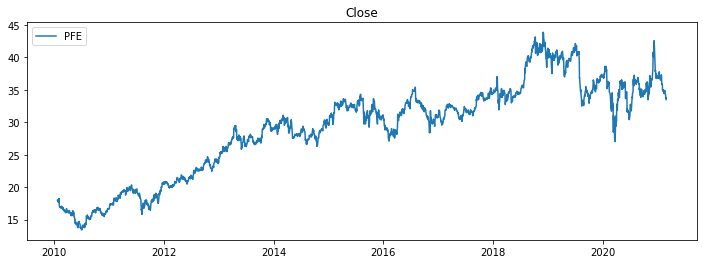

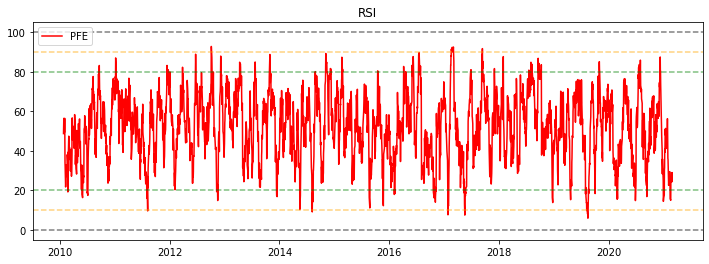

In [27]:
#Plotting 
df1 = df[(price_type, symbol)][start_date:end_date].iloc[time_period-1:]
plt.figure(figsize=(12,4))
plt.plot(df1, label = symbol)
plt.title(price_type)


plt.legend(loc='upper left')
plt.show()

#Plotting the RSI
plt.figure(figsize=(12,4))
plt.title('RSI')
plt.plot(RSI, label = symbol,color='red')
plt.axhline(0, linestyle='--', alpha=0.5, color = 'black')
plt.axhline(10, linestyle='--', alpha=0.5, color = 'orange')
plt.axhline(20, linestyle='--', alpha=0.5, color = 'green')
plt.axhline(80, linestyle='--', alpha=0.5, color = 'green')
plt.axhline(90, linestyle='--', alpha=0.5, color = 'orange')
plt.axhline(100, linestyle='--', alpha=0.5, color = 'black')


plt.legend(loc='upper left')
plt.show()

### RSI for AstraZeneca:

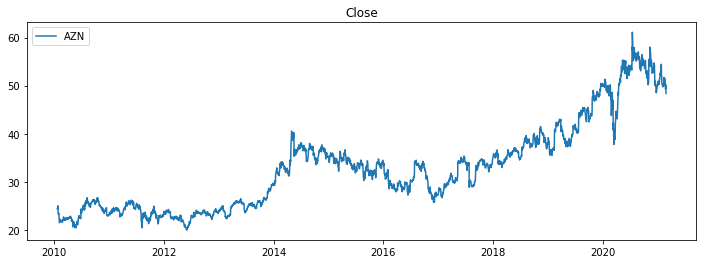

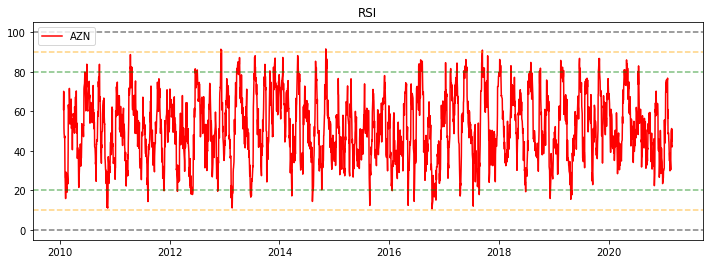

In [28]:
symbol='AZN'

RSI = calc_RSI(symbol)

#Plotting 
df1 = df[(price_type, symbol)][start_date:end_date].iloc[time_period-1:]
plt.figure(figsize=(12,4))
plt.plot(df1, label = symbol)
plt.title(price_type)


plt.legend(loc='upper left')
plt.show()

#Plotting the RSI
plt.figure(figsize=(12,4))
plt.title('RSI')
plt.plot(RSI, label = symbol,color='red')
plt.axhline(0, linestyle='--', alpha=0.5, color = 'black')
plt.axhline(10, linestyle='--', alpha=0.5, color = 'orange')
plt.axhline(20, linestyle='--', alpha=0.5, color = 'green')
plt.axhline(80, linestyle='--', alpha=0.5, color = 'green')
plt.axhline(90, linestyle='--', alpha=0.5, color = 'orange')
plt.axhline(100, linestyle='--', alpha=0.5, color = 'black')


plt.legend(loc='upper left')
plt.show()

MACD vs. Relative Strength  

The relative strength indicator (RSI) aims to signal whether a market is considered to be overbought or oversold in relation to recent price levels. The RSI is an oscillator that calculates average price gains and losses over a given period of time. The default time period is 14 periods with values bounded from 0 to 100.

MACD measures the relationship between two EMAs, while the RSI measures price change in relation to recent price highs and lows. These two indicators are often used together to provide analysts a more complete technical picture of a market.

These indicators both measure momentum in a market, but, because they measure different factors, they sometimes give contrary indications. For example, the RSI may show a reading above 70 for a sustained period of time, indicating a market is overextended to the buy side in relation to recent prices, while the MACD indicates the market is still increasing in buying momentum. Either indicator may signal an upcoming trend change by showing divergence from price (price continues higher while the indicator turns lower, or vice versa).

# Data Frame with all new variables

Moving Average (lagging) analyze whether a market is moving up, down, or sideways over time.
Bollinger Bands (lagging) measure how far a price swing will stretch before a counter impulse triggers a retracement.
Relative strength indicators (leading) measure oscillations in buying and selling pressure.
MACD (leading) evaluate the speed of price change over time.
Volume indicators (leading or lagging) tally up trades and quantify whether bulls or bear are in control.

In [29]:
def create_ml_df(df, symbol):
    '''
    This function creates a Dataframe for a given stock and fills it with calculated features
    INPUT:
    df: DataFrame with stock data from yahoo finance
    symbol: True value
    OUTPUT: 
    Plot showing the relationship between predicted and true values
    '''

    ml_df = pd.DataFrame (data = df.iloc[:, df.columns.get_level_values(1)==symbol].values,
                          index = df.iloc[:, df.columns.get_level_values(1)==symbol].index,
                          columns = df.iloc[:, df.columns.get_level_values(1)==symbol].columns.get_level_values(0))

    ml_df.fillna(method='ffill', inplace=True) 
    ml_df.fillna(method='bfill', inplace=True)
    macd, signal = calc_macd(symbol, start_date = ml_df.index[0], end_date = ml_df.index[-1])
    ml_df['MACD'] = macd
    ml_df['Signal'] = signal

    # Add Rolling mean and Rollind std 20 for Adj Close

    ml_df['Rolling mean Adj Close 20'] = ml_df['Adj Close'].rolling(window=20).mean()
    ml_df['Rolling std Adj Close 20'] = ml_df['Adj Close'].rolling(window=20).std()
    ml_df['Low 14'] = ml_df['Adj Close'].rolling(window=14).min()
    ml_df['High 14'] = ml_df['Adj Close'].rolling(window=14).max()

    # Williams %R - Its purpose is to tell whether a stock or commodity market is trading near the high or the low,
    # or somewhere in between, of its recent trading range.

    ml_df['Williams %R'] = (ml_df['High 14']-ml_df['Adj Close'])/(ml_df['High 14']-ml_df['Low 14'])*100

    # The oscillator is from 100 up to 0. A value of 100 means the close today was the lowest low of the past N days,
    # and 0 means today's close was the highest high of the past N days.

    ml_df['RSI'] = calc_RSI(symbol, start_date = ml_df.index[0], end_date = ml_df.index[-1])

    ml_df['Returns'] = np.log(ml_df['Adj Close'] / ml_df['Adj Close'].shift())
    ml_df.dropna(inplace=True)
    
    return ml_df

### Data Frame for Pfizer:

In [30]:
symbol='PFE'

In [31]:
Pfizer_df=create_ml_df(df, symbol)

In [32]:
Pfizer_df

Adj Close      Close       High        Low       Open  \
Date                                                                
2010-01-29  11.642064  17.703985  17.998102  17.571157  17.741936   
2010-02-01  11.723168  17.827324  18.017078  17.741936  17.827324   
2010-02-02  12.003924  18.254269  18.339659  17.808350  17.903227   
2010-02-03  11.726818  17.666035  17.884251  17.476280  17.732449   
2010-02-04  11.355238  17.106262  17.495256  17.087288  17.409866   
...               ...        ...        ...        ...        ...   
2021-02-22  34.259998  34.259998  34.369999  34.040001  34.330002   
2021-02-23  33.910000  33.910000  34.189999  33.680000  34.000000   
2021-02-24  33.750000  33.750000  34.049999  33.669998  33.869999   
2021-02-25  33.820000  33.820000  34.110001  33.540001  33.820000   
2021-02-26  33.490002  33.490002  33.900002  33.360001  33.840000   

                 Volume      MACD    Signal  Rolling mean Adj Close 20  \
Date                                                                     
2010-01-29   59071114.0  0.109149  0.196372                  11.833289   
2010-02-01   41586308.0  0.089999  0.175098                  11.852006   
2010-02-02   71262310.0  0.108028  0.161684                  11.861677   
2010-02-03  120151889.0  0.073997  0.144146                  11.865915   
2010-02-04   99352043.0  0.001838  0.115685                  11.853445   
...                 ...       ...       ...                        ...   
2021-02-22   34322500.0 -0.624150 -0.623345                  35.167865   
2021-02-23   37624200.0 -0.648223 -0.628321                  35.019424   
2021-02-24   30686100.0 -0.672461 -0.637149                  34.861500   
2021-02-25   37506100.0 -0.678203 -0.645360                  34.760000   
2021-02-26   41418100.0 -0.701297 -0.656547                  34.641500   

            Rolling std Adj Close 20     Low 14    High 14  Williams %R  \
Date                                                                      
2010-01-29                  0.286769  11.623345  12.478092    97.810028   
2010-02-01                  0.264865  11.623345  12.478092    88.321337   
2010-02-02                  0.266794  11.623345  12.478092    55.474652   
2010-02-03                  0.263778  11.623345  12.478092    87.894344   
2010-02-04                  0.282042  11.355238  12.478092   100.000000   
...                              ...        ...        ...          ...   
2021-02-22                  0.768874  34.259998  34.990002   100.000000   
2021-02-23                  0.705108  33.910000  34.970001   100.000000   
2021-02-24                  0.606563  33.750000  34.970001   100.000000   
2021-02-25                  0.602277  33.750000  34.970001    94.262326   
2021-02-26                  0.607586  33.490002  34.970001   100.000000   

                  RSI   Returns  
Date                             
2010-01-29  49.695138  0.001609  
2010-02-01  49.386505  0.006942  
2010-02-02  56.438339  0.023667  
2010-02-03  42.297673 -0.023355  
2010-02-04  34.117652 -0.032199  
...               ...       ...  
2021-02-22  24.161088 -0.005240  
2021-02-23  28.571429 -0.010268  
2021-02-24  28.458517 -0.004730  
2021-02-25  29.019639  0.002072  
2021-02-26  24.912362 -0.009805  

[2789 rows x 15 columns]

### Data Frame for Astra Zeneca

In [33]:
symbol='AZN'

In [34]:
AstraZeneca_df=create_ml_df(df, symbol)

In [35]:
AstraZeneca_df

Adj Close      Close       High        Low       Open      Volume  \
Date                                                                            
2010-01-29  13.798222  23.245001  23.535000  23.235001  23.405001   2158000.0   
2010-02-01  13.902106  23.420000  23.420000  23.225000  23.309999   3013200.0   
2010-02-02  13.911012  23.434999  23.545000  23.305000  23.340000   4070600.0   
2010-02-03  13.855564  22.490000  22.750000  22.455000  22.684999   3387000.0   
2010-02-04  13.501318  21.915001  22.285000  21.915001  22.230000   3697000.0   
...               ...        ...        ...        ...        ...         ...   
2021-02-22  49.611088  50.570000  50.810001  50.360001  50.669998  10776000.0   
2021-02-23  48.374981  49.310001  50.770000  49.220001  50.700001  14535900.0   
2021-02-24  49.149998  50.099998  50.320000  49.509998  49.660000  12218600.0   
2021-02-25  48.910000  48.910000  49.869999  48.750000  49.849998  12795900.0   
2021-02-26  48.380001  48.380001  48.919998  47.980000  48.849998   8547800.0   

                MACD    Signal  Rolling mean Adj Close 20  \
Date                                                        
2010-01-29  0.153864  0.264607                  14.299668   
2010-02-01  0.079895  0.227665                  14.298184   
2010-02-02  0.022229  0.186578                  14.290171   
2010-02-03 -0.098589  0.129544                  14.293631   
2010-02-04 -0.237993  0.056037                  14.284870   
...              ...       ...                        ...   
2021-02-22 -0.153592 -0.193265                  50.080023   
2021-02-23 -0.264730 -0.207558                  49.849480   
2021-02-24 -0.285767 -0.223200                  49.636594   
2021-02-25 -0.393921 -0.257344                  49.526491   
2021-02-26 -0.516447 -0.309165                  49.392830   

            Rolling std Adj Close 20     Low 14    High 14  Williams %R  \
Date                                                                      
2010-01-29                  0.430161  13.798222  14.958713   100.000000   
2010-02-01                  0.431546  13.798222  14.958713    91.048212   
2010-02-02                  0.437429  13.798222  14.958713    90.280829   
2010-02-03                  0.433489  13.798222  14.958713    95.058770   
2010-02-04                  0.448140  13.501318  14.958713   100.000000   
...                              ...        ...        ...          ...   
2021-02-22                  1.272759  48.787014  50.709850    57.142800   
2021-02-23                  1.128079  48.374981  50.709850   100.000000   
2021-02-24                  0.764357  48.374981  50.709850    66.806846   
2021-02-25                  0.696195  48.374981  50.709850    77.085702   
2021-02-26                  0.642172  48.374981  50.709850    99.784993   

                  RSI   Returns  
Date                             
2010-01-29  48.740238 -0.010059  
2010-02-01  46.460984  0.007501  
2010-02-02  47.553081  0.000640  
2010-02-03  34.797594 -0.003994  
2010-02-04  26.599331 -0.025900  
...               ...       ...  
2021-02-22  51.293746 -0.000395  
2021-02-23  44.993323 -0.025232  
2021-02-24  50.608264  0.015894  
2021-02-25  41.988939 -0.004895  
2021-02-26  42.458100 -0.010895  

[2789 rows x 15 columns]

# Deep Learning

Many authors consider stock market prices are highly unpredictable and volatile. This means that there are no consistent patterns in the data that allow you to model stock prices over time near-perfectly or in other words, is just a stochastic or random process and that there is no hope for machine learning. 

In any case, Let's see if I can at least model the data, so that the predictions I make correlate with the actual behavior of the data.  
Bacause of this I don't need the exact stock values of the future, but the stock price movements (that is, if it is going to rise of fall in the near future).

Among the several ways developed over the years to accurately predict the complex and volatile variation of stock prices, neural networks, more specifically RNNs, have shown significant application on the field. 

Here we are going to build two different models of RNNs — LSTM and GRU — with PyTorch to predict a couple of Pharma companies with Covid19 Vaccine stock market price and compare their performance in terms of time and efficiency.
Note: The risk of overfitting is really high!!

Recurrent Neural Network (RNN):
A recurrent neural network (RNN) is a type of artificial neural network designed to recognize data’s sequential patterns to predict the following scenarios. This architecture is especially powerful because of its nodes connections, allowing the exhibition of a temporal dynamic behavior. Another important feature of this architecture is the use of feedback loops to process a sequence. Such a characteristic allows information to persist, often described as a memory. This behavior makes RNNs great for Natural Language Processing (NLP) and time series problems. Based on this structure, architectures called Long short-term memory (LSTM), and Gated recurrent units (GRU) were developed.

1.-An LSTM unit is composed of a cell, an input gate, an output gate, and a forget gate. The cell remembers values over arbitrary time intervals, and the three gates regulate the flow of information into and out of the cell.

2.- On the other hand, a GRU has fewer parameters than LSTM, lacking an output gate. Both structures can address the “short-term memory” issue plaguing vanilla RNNs and effectively retain long-term dependencies in sequential data.

Although LSTM is currently more popular, the GRU is bound to eventually outshine it due to a superior speed while achieving similar accuracy and effectiveness. We are going to see that we have a similar outcome here, and the GRU model also performs better in this scenario.

In [36]:
Pfizer_df.sort_values('Date').head()

Adj Close      Close       High        Low       Open  \
Date                                                                
2010-01-29  11.642064  17.703985  17.998102  17.571157  17.741936   
2010-02-01  11.723168  17.827324  18.017078  17.741936  17.827324   
2010-02-02  12.003924  18.254269  18.339659  17.808350  17.903227   
2010-02-03  11.726818  17.666035  17.884251  17.476280  17.732449   
2010-02-04  11.355238  17.106262  17.495256  17.087288  17.409866   

                 Volume      MACD    Signal  Rolling mean Adj Close 20  \
Date                                                                     
2010-01-29   59071114.0  0.109149  0.196372                  11.833289   
2010-02-01   41586308.0  0.089999  0.175098                  11.852006   
2010-02-02   71262310.0  0.108028  0.161684                  11.861677   
2010-02-03  120151889.0  0.073997  0.144146                  11.865915   
2010-02-04   99352043.0  0.001838  0.115685                  11.853445   

            Rolling std Adj Close 20     Low 14    High 14  Williams %R  \
Date                                                                      
2010-01-29                  0.286769  11.623345  12.478092    97.810028   
2010-02-01                  0.264865  11.623345  12.478092    88.321337   
2010-02-02                  0.266794  11.623345  12.478092    55.474652   
2010-02-03                  0.263778  11.623345  12.478092    87.894344   
2010-02-04                  0.282042  11.355238  12.478092   100.000000   

                  RSI   Returns  
Date                             
2010-01-29  49.695138  0.001609  
2010-02-01  49.386505  0.006942  
2010-02-02  56.438339  0.023667  
2010-02-03  42.297673 -0.023355  
2010-02-04  34.117652 -0.032199

In [37]:
Pfizer_df = Pfizer_df.reset_index(drop=False)
Pfizer_df.head()

Date  Adj Close      Close       High        Low       Open  \
0 2010-01-29  11.642064  17.703985  17.998102  17.571157  17.741936   
1 2010-02-01  11.723168  17.827324  18.017078  17.741936  17.827324   
2 2010-02-02  12.003924  18.254269  18.339659  17.808350  17.903227   
3 2010-02-03  11.726818  17.666035  17.884251  17.476280  17.732449   
4 2010-02-04  11.355238  17.106262  17.495256  17.087288  17.409866   

        Volume      MACD    Signal  Rolling mean Adj Close 20  \
0   59071114.0  0.109149  0.196372                  11.833289   
1   41586308.0  0.089999  0.175098                  11.852006   
2   71262310.0  0.108028  0.161684                  11.861677   
3  120151889.0  0.073997  0.144146                  11.865915   
4   99352043.0  0.001838  0.115685                  11.853445   

   Rolling std Adj Close 20     Low 14    High 14  Williams %R        RSI  \
0                  0.286769  11.623345  12.478092    97.810028  49.695138   
1                  0.264865  11.623345  12.478092    88.321337  49.386505   
2                  0.266794  11.623345  12.478092    55.474652  56.438339   
3                  0.263778  11.623345  12.478092    87.894344  42.297673   
4                  0.282042  11.355238  12.478092   100.000000  34.117652   

    Returns  
0  0.001609  
1  0.006942  
2  0.023667  
3 -0.023355  
4 -0.032199

#### Let's focus on the Close Price evolution

C:\Users\srodri10\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


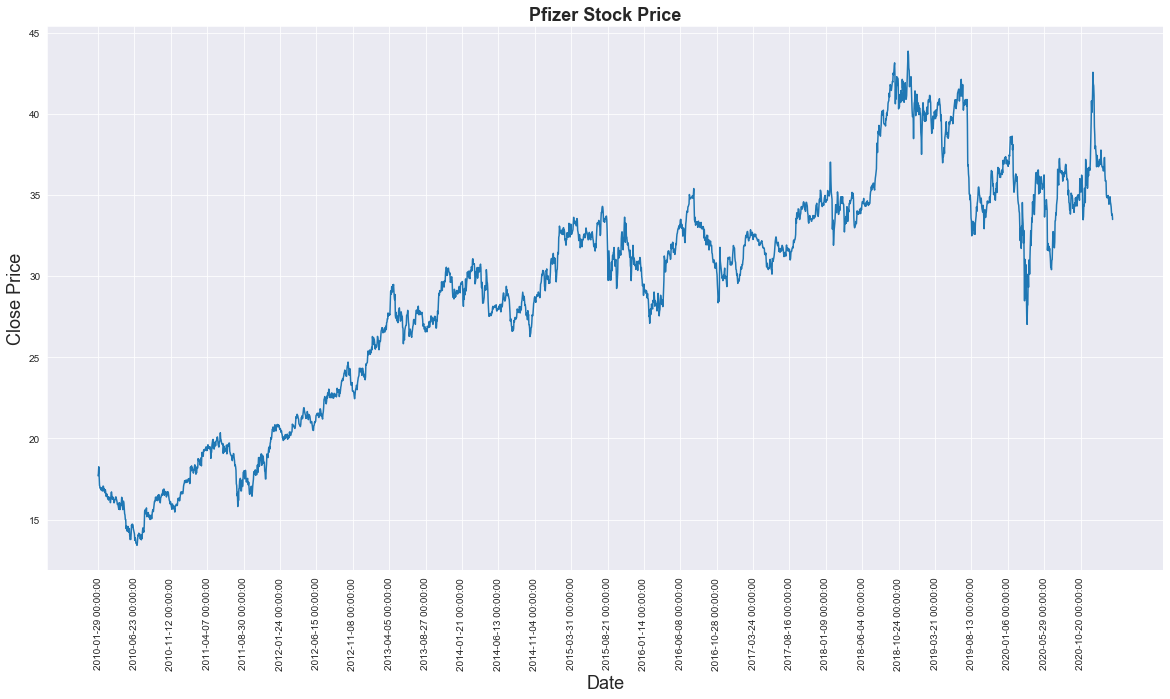

In [38]:
import seaborn as sns

sns.set_style("darkgrid")
plt.figure(figsize = (20,10))
plt.plot(Pfizer_df[['Close']])
plt.xticks(range(0,Pfizer_df.shape[0],100),Pfizer_df['Date'].loc[::100],rotation=90)
plt.title("Pfizer Stock Price",fontsize=18, fontweight='bold')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price',fontsize=18)
plt.show()

In [39]:
price = Pfizer_df[['Close']]

In [40]:
price.shape

(2789, 1)

In [41]:
price.head()

Close
0  17.703985
1  17.827324
2  18.254269
3  17.666035
4  17.106262

In [42]:
price.tail()

Close
2784  34.259998
2785  33.910000
2786  33.750000
2787  33.820000
2788  33.490002

Previous to introduce the data in the deep learning model it's necesarry to normalize. I'll use a scale between -1 and +1

In [43]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
price['Close'] = scaler.fit_transform(price['Close'].values.reshape(-1,1))

C:\Users\srodri10\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [44]:
price

Close
0    -0.718292
1    -0.710190
2    -0.682144
3    -0.720785
4    -0.757557
...        ...
2784  0.369276
2785  0.346285
2786  0.335774
2787  0.340373
2788  0.318695

[2789 rows x 1 columns]

#### Next cell is for spliting data between Train and Test

In [45]:
def split_data(stock, window):
    data_raw = stock.to_numpy() # convert to numpy array
    data = []
    
    # create all possible sequences of length seq_len
    for index in range(len(data_raw) - window): 
        data.append(data_raw[index: index + window])
    
    data = np.array(data);
    test_set_size = int(np.round(0.2*data.shape[0]));
    train_set_size = data.shape[0] - (test_set_size);
    
    x_train = data[:train_set_size,:-1,:]
    y_train = data[:train_set_size,-1,:]
    
    x_test = data[train_set_size:,:-1]
    y_test = data[train_set_size:,-1,:]
    
    return [x_train, y_train, x_test, y_test]

#### This exercise will be based on a window of 20 days for prediction

In [46]:
window = 20 # choose sequence length
x_train, y_train, x_test, y_test = split_data(price, window)
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ',y_train.shape)
print('x_test.shape = ',x_test.shape)
print('y_test.shape = ',y_test.shape)

x_train.shape =  (2215, 19, 1)
y_train.shape =  (2215, 1)
x_test.shape =  (554, 19, 1)
y_test.shape =  (554, 1)


In [47]:
import torch
import torch.nn as nn

x_train = torch.from_numpy(x_train).type(torch.Tensor)
x_test = torch.from_numpy(x_test).type(torch.Tensor)

y_train_lstm = torch.from_numpy(y_train).type(torch.Tensor)
y_test_lstm = torch.from_numpy(y_test).type(torch.Tensor)

y_train_gru = torch.from_numpy(y_train).type(torch.Tensor)
y_test_gru = torch.from_numpy(y_test).type(torch.Tensor)

### LSTM Network

In [48]:
class LSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(LSTM, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))
        out = self.fc(out[:, -1, :]) 
        return out

In [49]:
#Hyperparameters Selection:

input_dim = 1
hidden_dim = 64
num_layers = 2
output_dim = 1
num_epochs = 25

In [50]:
model = LSTM(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers)

In [51]:
criterion = torch.nn.MSELoss(reduction='mean')

In [52]:
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)

In [53]:
import time

hist = np.zeros(num_epochs)
start_time = time.time()
lstm = []

for t in range(num_epochs):
    y_train_pred = model(x_train)

    loss = criterion(y_train_pred, y_train_lstm)
    print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()

    optimiser.zero_grad()
    loss.backward()
    optimiser.step()
    
training_time = time.time()-start_time
print("Training time: {}".format(training_time))

Epoch  0 MSE:  0.2038818597793579
Epoch  1 MSE:  0.1899919956922531
Epoch  2 MSE:  0.15464481711387634
Epoch  3 MSE:  0.11577184498310089
Epoch  4 MSE:  0.013193788006901741
Epoch  5 MSE:  0.4644903242588043
Epoch  6 MSE:  0.048703160136938095
Epoch  7 MSE:  0.027237260714173317
Epoch  8 MSE:  0.0751328095793724
Epoch  9 MSE:  0.10253983736038208
Epoch  10 MSE:  0.11498119682073593
Epoch  11 MSE:  0.11879141628742218
Epoch  12 MSE:  0.11674373596906662
Epoch  13 MSE:  0.10960666090250015
Epoch  14 MSE:  0.09697654843330383
Epoch  15 MSE:  0.07799242436885834
Epoch  16 MSE:  0.05353613570332527
Epoch  17 MSE:  0.03134253993630409
Epoch  18 MSE:  0.019480818882584572
Epoch  19 MSE:  0.02701900340616703
Epoch  20 MSE:  0.04460158571600914
Epoch  21 MSE:  0.02338232286274433
Epoch  22 MSE:  0.0100614745169878
Epoch  23 MSE:  0.00893760658800602
Epoch  24 MSE:  0.011643738485872746
Training time: 26.280245065689087


In [54]:
predict = pd.DataFrame(scaler.inverse_transform(y_train_pred.detach().numpy()))
original = pd.DataFrame(scaler.inverse_transform(y_train_lstm.detach().numpy()))

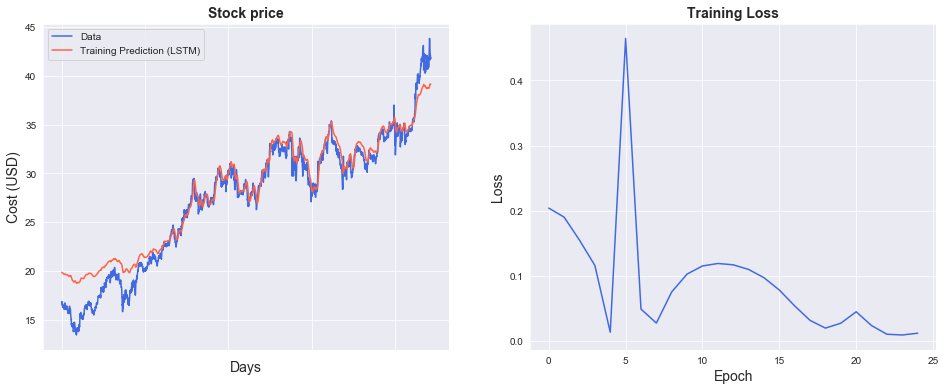

In [55]:
import seaborn as sns
sns.set_style("darkgrid")    

fig = plt.figure()
fig.subplots_adjust(hspace=0.2, wspace=0.2)

plt.subplot(1, 2, 1)
ax = sns.lineplot(x = original.index, y = original[0], label="Data", color='royalblue')
ax = sns.lineplot(x = predict.index, y = predict[0], label="Training Prediction (LSTM)", color='tomato')
ax.set_title('Stock price', size = 14, fontweight='bold')
ax.set_xlabel("Days", size = 14)
ax.set_ylabel("Cost (USD)", size = 14)
ax.set_xticklabels('', size=10)


plt.subplot(1, 2, 2)
ax = sns.lineplot(data=hist, color='royalblue')
ax.set_xlabel("Epoch", size = 14)
ax.set_ylabel("Loss", size = 14)
ax.set_title("Training Loss", size = 14, fontweight='bold')
fig.set_figheight(6)
fig.set_figwidth(16)

In [56]:
import math, time
from sklearn.metrics import mean_squared_error

# make predictions
y_test_pred = model(x_test)

# invert predictions
y_train_pred = scaler.inverse_transform(y_train_pred.detach().numpy())
y_train = scaler.inverse_transform(y_train_lstm.detach().numpy())
y_test_pred = scaler.inverse_transform(y_test_pred.detach().numpy())
y_test = scaler.inverse_transform(y_test_lstm.detach().numpy())

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train[:,0], y_train_pred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test[:,0], y_test_pred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
lstm.append(trainScore)
lstm.append(testScore)
lstm.append(training_time)

Train Score: 1.64 RMSE
Test Score: 1.94 RMSE


In [57]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(price)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[window:len(y_train_pred)+window, :] = y_train_pred

# shift test predictions for plotting
testPredictPlot = np.empty_like(price)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(y_train_pred)+window-1:len(price)-1, :] = y_test_pred

original = scaler.inverse_transform(price['Close'].values.reshape(-1,1))

predictions = np.append(trainPredictPlot, testPredictPlot, axis=1)
predictions = np.append(predictions, original, axis=1)
result = pd.DataFrame(predictions)

In [58]:
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(go.Scatter(x=result.index, y=result[0],
                    mode='lines',
                    name='Train prediction')))
fig.add_trace(go.Scatter(x=result.index, y=result[1],
                    mode='lines',
                    name='Test prediction'))
fig.add_trace(go.Scatter(go.Scatter(x=result.index, y=result[2],
                    mode='lines',
                    name='Actual Value')))
fig.update_layout(
    xaxis=dict(
        showline=True,
        showgrid=True,
        showticklabels=False,
        linecolor='black',
        linewidth=2
    ),
    yaxis=dict(
        title_text='Close',
        titlefont=dict(
            family='Rockwell',
            size=12,
            color='black',
        ),
        showline=True,
        showgrid=True,
        showticklabels=True,
        linecolor='black',
        linewidth=2,
        ticks='outside',
        tickfont=dict(
            family='Rockwell',
            size=12,
            color='black',
        ),
    ),
    showlegend=True,
    template = 'plotly_white'

)



annotations = []
annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                              xanchor='left', yanchor='bottom',
                              text='Results (LSTM)',
                              font=dict(family='Rockwell',
                                        size=26,
                                        color='black'),
                              showarrow=False))
fig.update_layout(annotations=annotations)

fig.show()

### GRU Network

In [59]:
class GRU(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(GRU, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        
        self.gru = nn.GRU(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
        out, (hn) = self.gru(x, (h0.detach()))
        out = self.fc(out[:, -1, :]) 
        return out

In [60]:
model = GRU(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers)

In [61]:
criterion = torch.nn.MSELoss(reduction='mean')

In [62]:
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)

In [63]:
hist = np.zeros(num_epochs)
start_time = time.time()
gru = []

for t in range(num_epochs):
    y_train_pred = model(x_train)

    loss = criterion(y_train_pred, y_train_gru)
    print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()

    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

training_time = time.time()-start_time    
print("Training time: {}".format(training_time))

Epoch  0 MSE:  0.18370172381401062
Epoch  1 MSE:  0.09015723317861557
Epoch  2 MSE:  0.10559001564979553
Epoch  3 MSE:  0.06434367597103119
Epoch  4 MSE:  0.015960298478603363
Epoch  5 MSE:  0.02182960882782936
Epoch  6 MSE:  0.0313144214451313
Epoch  7 MSE:  0.028233345597982407
Epoch  8 MSE:  0.015901386737823486
Epoch  9 MSE:  0.004213178530335426
Epoch  10 MSE:  0.005237102508544922
Epoch  11 MSE:  0.014500132761895657
Epoch  12 MSE:  0.012258151546120644
Epoch  13 MSE:  0.004672918934375048
Epoch  14 MSE:  0.002703245496377349
Epoch  15 MSE:  0.005078490357846022
Epoch  16 MSE:  0.007470378652215004
Epoch  17 MSE:  0.007740392815321684
Epoch  18 MSE:  0.005984507501125336
Epoch  19 MSE:  0.003603964811190963
Epoch  20 MSE:  0.0022165528498589993
Epoch  21 MSE:  0.00239828834310174
Epoch  22 MSE:  0.0032647091429680586
Epoch  23 MSE:  0.003637142013758421
Epoch  24 MSE:  0.003219320671632886
Training time: 21.754814624786377


In [64]:
predict = pd.DataFrame(scaler.inverse_transform(y_train_pred.detach().numpy()))
original = pd.DataFrame(scaler.inverse_transform(y_train_gru.detach().numpy()))

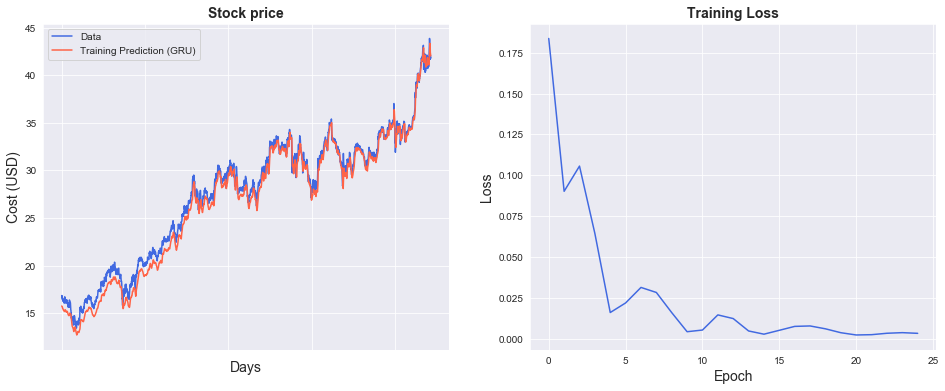

In [65]:
import seaborn as sns
sns.set_style("darkgrid")    

fig = plt.figure()
fig.subplots_adjust(hspace=0.2, wspace=0.2)

plt.subplot(1, 2, 1)
ax = sns.lineplot(x = original.index, y = original[0], label="Data", color='royalblue')
ax = sns.lineplot(x = predict.index, y = predict[0], label="Training Prediction (GRU)", color='tomato')
ax.set_title('Stock price', size = 14, fontweight='bold')
ax.set_xlabel("Days", size = 14)
ax.set_ylabel("Cost (USD)", size = 14)
ax.set_xticklabels('', size=10)


plt.subplot(1, 2, 2)
ax = sns.lineplot(data=hist, color='royalblue')
ax.set_xlabel("Epoch", size = 14)
ax.set_ylabel("Loss", size = 14)
ax.set_title("Training Loss", size = 14, fontweight='bold')
fig.set_figheight(6)
fig.set_figwidth(16)

In [66]:
import math, time
from sklearn.metrics import mean_squared_error

# make predictions
y_test_pred = model(x_test)

# invert predictions
y_train_pred = scaler.inverse_transform(y_train_pred.detach().numpy())
y_train = scaler.inverse_transform(y_train_gru.detach().numpy())
y_test_pred = scaler.inverse_transform(y_test_pred.detach().numpy())
y_test = scaler.inverse_transform(y_test_gru.detach().numpy())

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train[:,0], y_train_pred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test[:,0], y_test_pred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
gru.append(trainScore)
gru.append(testScore)
gru.append(training_time)

Train Score: 0.86 RMSE
Test Score: 0.88 RMSE


In [67]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(price)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[window:len(y_train_pred)+window, :] = y_train_pred

# shift test predictions for plotting
testPredictPlot = np.empty_like(price)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(y_train_pred)+window-1:len(price)-1, :] = y_test_pred

original = scaler.inverse_transform(price['Close'].values.reshape(-1,1))

predictions = np.append(trainPredictPlot, testPredictPlot, axis=1)
predictions = np.append(predictions, original, axis=1)
result = pd.DataFrame(predictions)

In [68]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(go.Scatter(x=result.index, y=result[0],
                    mode='lines',
                    name='Train prediction')))
fig.add_trace(go.Scatter(x=result.index, y=result[1],
                    mode='lines',
                    name='Test prediction'))
fig.add_trace(go.Scatter(go.Scatter(x=result.index, y=result[2],
                    mode='lines',
                    name='Actual Value')))
fig.update_layout(
    xaxis=dict(
        showline=True,
        showgrid=True,
        showticklabels=False,
        linecolor='white',
        linewidth=2
    ),
    yaxis=dict(
        title_text='Close (USD)',
        titlefont=dict(
            family='Rockwell',
            size=12,
            color='white',
        ),
        showline=True,
        showgrid=True,
        showticklabels=True,
        linecolor='white',
        linewidth=2,
        ticks='outside',
        tickfont=dict(
            family='Rockwell',
            size=12,
            color='white',
        ),
    ),
    showlegend=True,
    template = 'plotly_dark'

)



annotations = []
annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                              xanchor='left', yanchor='bottom',
                              text='Results (GRU)',
                              font=dict(family='Rockwell',
                                        size=26,
                                        color='white'),
                              showarrow=False))
fig.update_layout(annotations=annotations)

fig.show()

In [69]:
lstm = pd.DataFrame(lstm, columns=['LSTM'])
gru = pd.DataFrame(gru, columns=['GRU'])
result = pd.concat([lstm, gru], axis=1, join='inner')
result.index = ['Train RMSE', 'Test RMSE', 'Train Time']
result

LSTM        GRU
Train RMSE   1.642651   0.863736
Test RMSE    1.938067   0.876605
Train Time  26.280245  21.754815